Exercise 1: Bayesian A testing for Swedish Fish Incorporated
=======================

Swedish Fish Incorporated is the largest Swedish company delivering fish by mail order. They are now trying to get into the lucrative Danish market by selling one year Salmon subscriptions. The marketing department have done a pilot study and tried the following marketing method:

**A:** Sending a mail with a colorful brochure that invites people to sign up for a one year salmon subscription.

The marketing department sent out 16 mails of type A. Six Danes that received a mail signed up for one year of salmon and marketing now wants to know, how good is method A?

Question I, Build a Bayesian model that answers the question: What would the rate of sign-up be if method A was used on a larger number of people?
-------------------

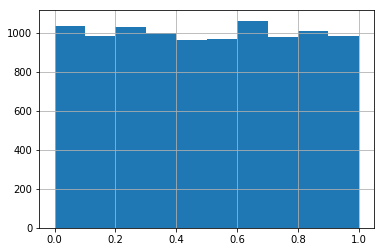

In [4]:
# Import libraries
import pandas as pd
import numpy as np

# Number of random draws from the prior
n_draws = 10000

# Sample n_draws draws from the prior distribution into a pandas Series (to have convenient
# methods available for histograms and descriptive statistics, e.g. median)
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draws))

# It's always good to eyeball the prior to make sure it looks ok
prior_rate.hist()


Number of draws left: 583
Posterior mean: 0.391
Posterior median: 0.382
Posterior 95% quantile interval: 0.185-0.642


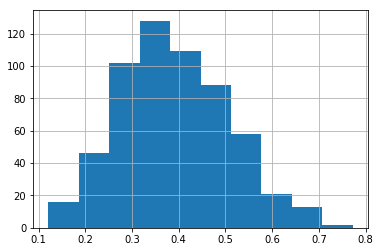

In [5]:
# Defining the generative model
def gen_model(prob):
    return(np.random.binomial(16,prob))

# Simulating the data using the parameters from the prior and the generative model
sim_data = list()
for p in prior_rate:
    sim_data.append(gen_model(p))

# Observed data
observed_data = 6

# Here you filter off all draws that do not match the data
post_rate = prior_rate[list(map(lambda x: x == observed_data, sim_data))]

post_rate.hist() # Eyeball the posterior

# See that we got enough draws left after the filtering.
# There are no rules here, but you probably want to aim for >1000 draws.

# Now you can summarize the posterior, where a common summary is to take the mean or the median posterior,
# and perhaps a 95% quantile interval.

print('Number of draws left: %d\nPosterior mean: %.3f\nPosterior median: %.3f\nPosterior 95%% quantile interval: %.3f-%.3f' %
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))

Question II, What’s the probability that method A is better than telemarketing?
----------------
So marketing just told us that the rate of sign-up would be 20% if salmon subscribers were snared by a telemarketing campaign instead (to us it’s very unclear where marketing got this very precise number from). So given the model and the data that we developed in the last question, what’s the probability that method A has a higher rate of sign-up than telemarketing?

In [6]:
sum(post_rate > 0.2) / len(post_rate) # or just np.mean(post_rate > 0.2)

0.9605488850771869

Question III, If method A was used on 100 people what would be number of sign-ups?
--------------

Sign-up 95% quantile interval 17-65


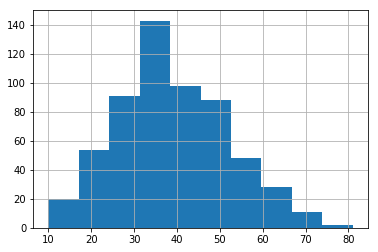

In [7]:
# This can be done with a for loop
signups = list()

for p in post_rate:
    signups.append(np.random.binomial(100, p))


# But we can write it like this:
signups = pd.Series([np.random.binomial(n = 100, p = p) for p in post_rate])

signups.hist()
print('Sign-up 95%% quantile interval %d-%d' % tuple(signups.quantile([.025, .975]).values))